In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
boston_data=pd.read_csv('data/machine/boston_housing.csv')
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1.    Consider the columns, ‘RM’, ‘DIS’, ‘TAX’, ‘INDUS’ as predictors, and ‘MEDV’ as the target variable

2.    Calculate the Variance Inflation Factor for each of the selected predictors. Based on the VIF factor, finalize the list of predictors.

3.    For every predictor identified, visualize its association with the target column using scatter plot.

4.    Split the data into train and test datasets, in the ratio of 67:33.

5.    Build a Linear Regression model, to predict the target variable using the selected predictors.

6.    Observe the coefficients and intercept values for the model. 

7.    Evaluate the model using mean squared error values, R-squared values, and adjusted R-Squared values, on the train and the test data.

 

In [6]:
#1
X=boston_data[['RM', 'DIS', 'TAX', 'INDUS']]
Y=boston_data['MEDV']

In [7]:
#2
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)


RM       16.747965
DIS       6.880607
TAX      13.861510
INDUS     9.598374
dtype: float64


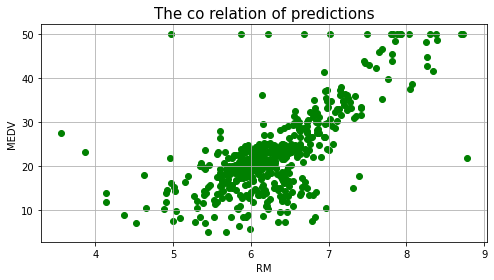

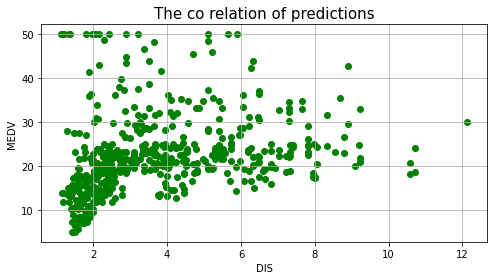

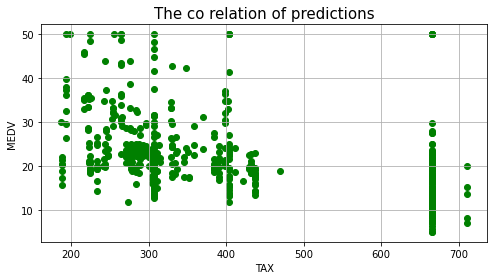

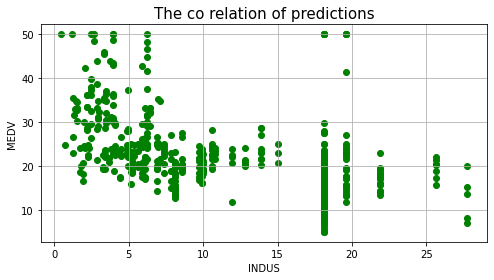

In [8]:
#3
for col in X:
    fig=plt.figure(figsize=(8,4))
    ax=fig.gca()
    features=boston_data[col]
    label=boston_data['MEDV']
    plt.scatter(x=features, y=label, color='g')
    plt.title('The co relation of predictions', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.grid()
    plt.show()

## 4.Split the Data

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(339, 4) (339,)
(167, 4) (167,)


## 5. Multiple Linear Regression model

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
print('test_score:', model.score(x_test, y_test) )
print('train_score:', model.score(x_train, y_train))
pred=model.predict(x_test)
print(pred)

test_score: 0.5060056001257378
train_score: 0.5972805957232976
[23.56318741 18.19983264 24.70774245 11.19003537 21.30217173 20.73012624
 14.79868875 23.40723876 14.68121582 24.88427295 15.8711894  21.45367269
 18.72558391  5.88361946 33.49382524 29.00203516 17.28616281 31.73250343
 27.96398227 21.9877746  25.75712728 18.36750108 23.01440182 27.05957455
 20.54978366 -0.27666846 21.99002241 17.41585302 40.16015972 21.5504992
 17.46308273 16.38322183 22.17780076 22.62754204 27.19302066 14.62246772
 16.21040571 15.56623072 18.7895982  17.26656375 21.54591684 21.35895519
 21.76655988 11.43714953 25.05045831 26.20521808 18.51943937 20.62120956
 11.28199884 27.35836671 20.80209092 18.78713823 22.69267015 37.57432171
 16.46596702 20.68754925 19.15542366 19.64750589 14.50788844 21.92266834
 17.94446556 22.81734812 29.29409188 27.28201008 13.46744519 26.02657077
 21.02851463 24.04113389 23.00155073 21.3520151  22.14386252 21.97544026
 23.81752012 27.88309277 21.28442922  8.56589496 40.33297215 2

## 6.find out the intercept and coefficient of the model

In [30]:
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: -16.400330141858866 
Coefficients: [ 7.78049546 -0.49486174 -0.0140603  -0.21108811]


# Scatter plot with predicted values

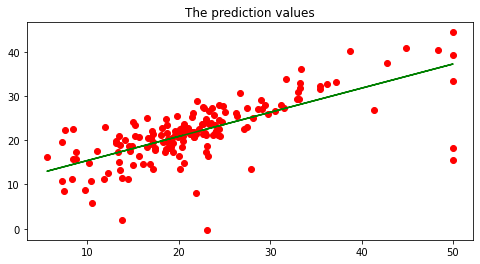

In [31]:
fig=plt.figure(figsize=(8,4))
plt.scatter(y_test, pred, color='r')
plt.title('The prediction values')
z=np.polyfit(y_test, pred, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='g')

# 7. Observe the r2_score and MSE, RMSE values

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

r2_value=r2_score(y_test, pred)
print('r2_value:', r2_value)

mse=mean_squared_error(y_test, pred)
print('mse:', mse)

rmse=np.sqrt(mse)

print('RMSE:', rmse)

r2_value: 0.5060056001257378
mse: 39.82688491379004
RMSE: 6.310854531185934


# adjusted r2_score

In [35]:
z=model.score(X, Y)
adjusted_score=1-(1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_score)

0.5658750299689893
